In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
df=pd.read_csv('sales.csv')

,Temperature (°C),Ice Cream Sales (units)
0,-4.662263,41.842986
1,-4.316559,34.661120
2,-4.213985,39.383001
3,-3.949661,37.539845
4,-3.578554,32.284531
5,-3.455712,30.001138
6,-3.108440,22.635401
7,-3.081303,25.365022
8,-2.672461,19.226970
9,-2.652287,20.279679


In [39]:
t=df.iloc[:,0].values
u=df.iloc[:,1].values

In [40]:
t.shape,u.shape

((49,), (49,))

In [55]:
t=t.reshape(-1, 1)

In [56]:
u=u.reshape(-1, 1)

In [46]:
from sklearn.model_selection import train_test_split

In [57]:
t_train,t_test,u_train,u_test=train_test_split(t,u,test_size=0.25,random_state=2)

In [58]:
t_train.shape,t_test.shape,u_train.shape,u_test.shape

((36, 1), (13, 1), (36, 1), (13, 1))

In [59]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(t_train,u_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [62]:
model.score(t_train,u_train)

0.026428744644855007

In [63]:
model.score(t_test,u_test)

-0.05642184626434288

C:\Users\lokes\AppData\Local\Temp\ipykernel_6540\1028089360.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


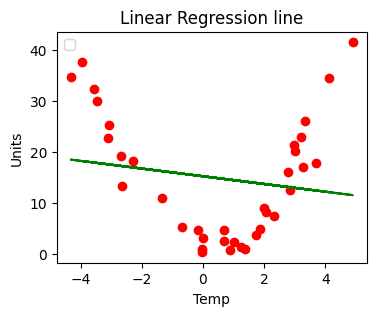

In [66]:
plt.figure(figsize=(4,3))
plt.title('Training information')
plt.scatter(t_train,u_train,color='red')
plt.plot(t_train,model.predict(t_train),color='green')
plt.xlabel('Temp')
plt.ylabel('Units')
plt.legend()

In [77]:
from sklearn.preprocessing import PolynomialFeatures
degr=2
pl1=PolynomialFeatures(degr)

In [94]:
t_train_poly=pl1.fit_transform(t_train)
t_test_poly=pl1.fit_transform(t_test)

In [95]:
model=LinearRegression()
model.fit(t_train_poly,u_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


Text(0, 0.5, 'Units')

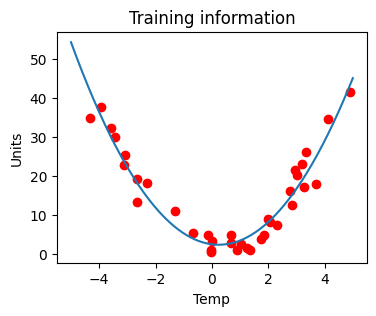

In [97]:
plt.figure(figsize=(4,3))
plt.title('Training information')
plt.plot(np.linspace(-5,5,500).reshape(500,1),model.predict(pl1.fit_transform(np.linspace(-5,5,500).reshape(500,1))))
plt.scatter(t_train,u_train,color='red')
plt.xlabel('Temp')
plt.ylabel('Units')